1


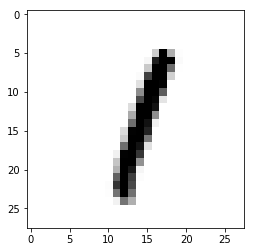

here it is
[[0.01445886]
 [0.98313379]
 [0.03758832]
 [0.0407742 ]
 [0.0060764 ]
 [0.03042195]
 [0.00385027]
 [0.05512058]
 [0.07337665]
 [0.00487963]]
finished?


"a = np.zeros([3,2])\na[0,0] = 1\na[0,1] = 2\na[1,0] = 9\na[2,1] = 12\n\nplt.imshow(a, interpolation = 'nearest')\nplt.show()"

In [6]:
'''Make your own Neural Network
Tariq Rashid
May 30, 2017'''

import numpy as np
import matplotlib.pyplot as plt
from math import exp
#import scipy.special

class NeuralNetwork(object):

    #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #link weight matrices, wih and who
        #weights inside the arrays are w_i_j, where link
        #is from node i to node j in the next layer
        #w11 w21
        #w12 w22 etc
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                       (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5),
                                       (self.onodes, self.hnodes))
        
        #learning rate
        self.lr = learningrate
        pass

    def activation_function(self,x):
        #activation function is the sigmoid function
        out = np.zeros([len(x),1])
        for i,element in enumerate(x):
            #print("element: ",element)
            out[i] = sigmoid(x[i][0])
            #print(out)
        return out

    #train the neural network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        #calculate signals entering final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate signals exiting final output layer
        final_outputs = self.activation_function(final_inputs)

        #output layer error is the (target - actual)
        output_errors = targets - final_outputs
        #hidden layer error is the output_errors, split by weights,
        #recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        #update the weights for the links between the
        #hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs *\
                                      (1.0 - final_outputs)),
                                     np.transpose(hidden_outputs))

        #update the weights for the links between the input
        #and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs *\
                                      (1.0 - hidden_outputs)),
                                     np.transpose(inputs))
        pass

    #query the neural network
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list,ndmin=2).T

        #calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        #calculate the signals emerging from the
        #hidden layer
        #print("Hidden inputs:", hidden_inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        #calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final
        #output layer
        final_outputs = self.activation_function(final_inputs)
        #print("final_outputs: ",final_outputs)
        return final_outputs

def sigmoid(t):
    return 1/(1+exp(-t))

#number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate
learning_rate = 0.3

#create instance of neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data CSV file into a list
training_data_file = open('mnist_train_100.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#train the neural network
#go through all records in training data set
for record in training_data_list:
    #split the record by the commas
    all_values = record.split(',')
    #scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #create the target output values (all 0.01 except the
    #desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    #print("all values[0]: ",all_values[0])
    #print("targets: ",targets)
    #all values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

#load the mnist data csv file into a list
test_data_file = open('mnist_test_10.csv','r')
test_data_list = test_data_file.readlines()
test_data_file.close()

###TO TEST###
#get the first test record
all_values = test_data_list[5].split(',')
#print the label
print(all_values[0])
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation='None')
plt.show()

print("here it is")
print(n.query((np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01))
print("finished?")

'''a = np.zeros([3,2])
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12

plt.imshow(a, interpolation = 'nearest')
plt.show()'''

#print(n.query([1.0, 0.5, -1.5]))



In [9]:
import tensorflow

ImportError: No module named 'tensorflow'

In [8]:
import numpy